In [4]:
from google.colab import drive
from math import pi
import numpy as np
from scipy import interpolate 
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [5]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(-1.0, 1.0)

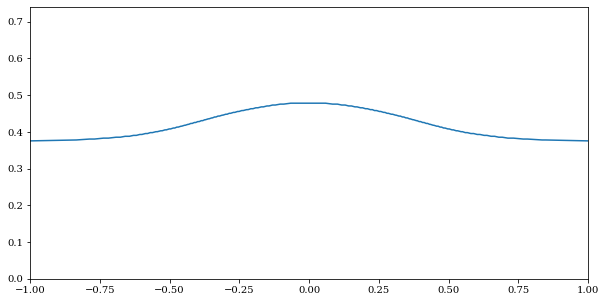

In [6]:
data = np.load('/content/gdrive/My Drive/3D_STEADY_NSTOKES/KV_0P001/abd_aneurysm_axisymm_300x800_nu_0p001.npy', allow_pickle = True)
ff = data[3].reshape(300,800)
z = data[4]
r = data[5]

zz,rr = np.meshgrid(z,r)
rpls = []
zpls = []

for i in tqdm(range(800)):
  for j in range(300):
    if ff[j,i] > -0.3 and ff[j,i] < 0.3:
      rpls = rpls + [rr[j,i]]
      zpls = zpls + [zz[j,i]]

fig, axs = plt.subplots(1, 1,figsize=(10,5))
axs.plot(zpls,rpls)

plt.ylim([0, 0.74])
plt.xlim([-1,1])

In [ ]:
a = np.array(data[4])
a = a.reshape(len(a), 1)
print(a)
print(np.shape(a))

[[-1.        ]
 [-0.99749687]
 [-0.99499374]
 [-0.99249061]
 [-0.98998748]
 [-0.98748436]
 [-0.98498123]
 [-0.9824781 ]
 [-0.97997497]
 [-0.97747184]
 [-0.97496871]
 [-0.97246558]
 [-0.96996245]
 [-0.96745932]
 [-0.9649562 ]
 [-0.96245307]
 [-0.95994994]
 [-0.95744681]
 [-0.95494368]
 [-0.95244055]
 [-0.94993742]
 [-0.94743429]
 [-0.94493116]
 [-0.94242804]
 [-0.93992491]
 [-0.93742178]
 [-0.93491865]
 [-0.93241552]
 [-0.92991239]
 [-0.92740926]
 [-0.92490613]
 [-0.922403  ]
 [-0.91989987]
 [-0.91739675]
 [-0.91489362]
 [-0.91239049]
 [-0.90988736]
 [-0.90738423]
 [-0.9048811 ]
 [-0.90237797]
 [-0.89987484]
 [-0.89737171]
 [-0.89486859]
 [-0.89236546]
 [-0.88986233]
 [-0.8873592 ]
 [-0.88485607]
 [-0.88235294]
 [-0.87984981]
 [-0.87734668]
 [-0.87484355]
 [-0.87234043]
 [-0.8698373 ]
 [-0.86733417]
 [-0.86483104]
 [-0.86232791]
 [-0.85982478]
 [-0.85732165]
 [-0.85481852]
 [-0.85231539]
 [-0.84981227]
 [-0.84730914]
 [-0.84480601]
 [-0.84230288]
 [-0.83979975]
 [-0.83729662]
 [-0.83479

In [ ]:
r = np.array(data[5])
r = r.reshape(len(r), 1)
print(r)
print(np.shape(r))

[[0.        ]
 [0.00250313]
 [0.00500626]
 [0.00750939]
 [0.01001252]
 [0.01251564]
 [0.01501877]
 [0.0175219 ]
 [0.02002503]
 [0.02252816]
 [0.02503129]
 [0.02753442]
 [0.03003755]
 [0.03254068]
 [0.0350438 ]
 [0.03754693]
 [0.04005006]
 [0.04255319]
 [0.04505632]
 [0.04755945]
 [0.05006258]
 [0.05256571]
 [0.05506884]
 [0.05757196]
 [0.06007509]
 [0.06257822]
 [0.06508135]
 [0.06758448]
 [0.07008761]
 [0.07259074]
 [0.07509387]
 [0.077597  ]
 [0.08010013]
 [0.08260325]
 [0.08510638]
 [0.08760951]
 [0.09011264]
 [0.09261577]
 [0.0951189 ]
 [0.09762203]
 [0.10012516]
 [0.10262829]
 [0.10513141]
 [0.10763454]
 [0.11013767]
 [0.1126408 ]
 [0.11514393]
 [0.11764706]
 [0.12015019]
 [0.12265332]
 [0.12515645]
 [0.12765957]
 [0.1301627 ]
 [0.13266583]
 [0.13516896]
 [0.13767209]
 [0.14017522]
 [0.14267835]
 [0.14518148]
 [0.14768461]
 [0.15018773]
 [0.15269086]
 [0.15519399]
 [0.15769712]
 [0.16020025]
 [0.16270338]
 [0.16520651]
 [0.16770964]
 [0.17021277]
 [0.17271589]
 [0.17521902]
 [0.17

In [ ]:
axial_velocity = np.array(data[0])
axial_velocity=axial_velocity.reshape(len(r), len(a))
axial_velocity = np.flip(axial_velocity, axis = 0)
print(axial_velocity)
print(np.shape(axial_velocity))

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.99982509 0.99980495 0.99976103 ... 0.96648046 0.96660182 0.96669563]
 [0.99995972 0.99994901 0.99990062 ... 0.96662489 0.96674403 0.96680678]
 [1.00000779 1.00002026 0.99996844 ... 0.96670393 0.96682625 0.96684931]]
(300, 800)


In [ ]:
radial_velocity = np.array(data[1])
radial_velocity = radial_velocity.reshape(len(r), len(a))
axial_velocity = np.flip(axial_velocity, axis = 0)
print(radial_velocity)
print(np.shape(radial_velocity))

[[ 8.41091437e-05  4.32721884e-05  2.80712622e-05 ... -6.05910022e-05
  -6.11796129e-05 -8.54792744e-05]
 [ 8.21957263e-05  4.65933399e-05  3.50768481e-05 ... -7.83041745e-05
  -7.81941415e-05 -1.00174777e-04]
 [ 1.13266484e-04  8.08308646e-05  6.36274675e-05 ... -1.46017804e-04
  -1.49245902e-04 -1.67135571e-04]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(300, 800)


In [ ]:
print(np.shape(r))
print(np.shape(a))
print(np.shape(axial_velocity))
print(np.shape(radial_velocity))

(300, 1)
(800, 1)
(300, 800)
(300, 800)


In [ ]:

f_axial_velocity = interpolate.RectBivariateSpline(r, a, axial_velocity)
f_radial_velocity = interpolate.RectBivariateSpline(r, a , radial_velocity)


In [ ]:
f_axial_velocity(0, 1)

array([[0.96684931]])

In [ ]:
x = np.linspace(-1, 1, 800)
y = np.linspace(-0.74843554, 0.74843554, 200)
z = np.linspace(-0.74843554, 0.74843554, 200)

xx, yy, zz = np.meshgrid(x, y, z)

In [ ]:
rr = np.sqrt(np.add(np.square(yy), np.square(zz)))
thetatheta = np.arctan2(yy,zz)

In [ ]:
def uxuyuz(x, y, z, xx, rr, thetatheta, f_axial_velocity, f_radial_velocity):
    ux = np.zeros((len(y), len(x), len(z)))
    uy = np.zeros((len(y), len(x), len(z)))
    uz = np.zeros((len(y), len(x), len(z)))
    for i in range(len(y)):
        print(i)
        for j in range(len(x)):
            for k in range(len(z)):
                ux[i, j, k] = f_axial_velocity(rr[i, j, k], xx[i, j, k])
                uy[i, j, k] = f_radial_velocity(rr[i, j, k], xx[i, j, k])*np.sin(thetatheta[i, j, k])
                uz[i, j, k] = f_radial_velocity(rr[i, j, k], xx[i, j, k])*np.cos(thetatheta[i, j, k])
    
    return ux, uy, uz

In [ ]:
ux, uy, uz = uxuyuz(x, y, z, xx, rr, thetatheta, f_axial_velocity, f_radial_velocity)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


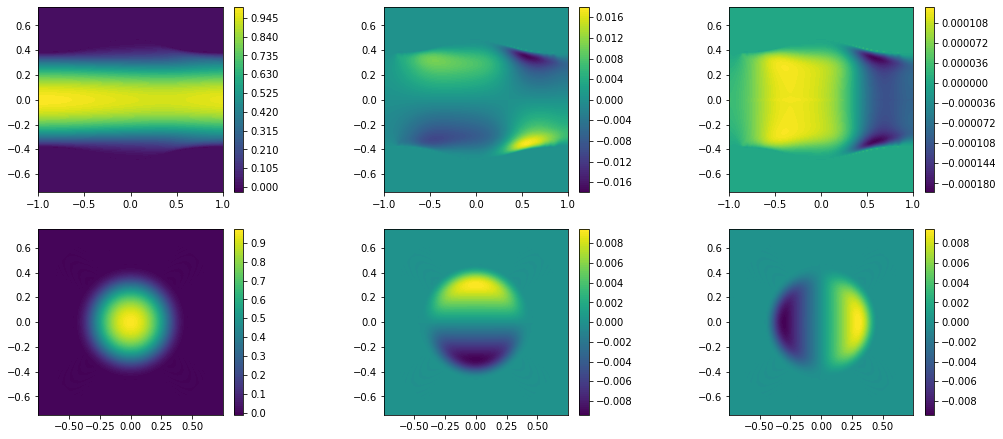

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(16.5, 7.5))

axs_0_0 = axs[0, 0].tricontourf(xx[:, :, 100].flatten(), yy[:, :, 100].flatten() , ux[:, :, 100].flatten(), 100)
fig.colorbar(axs_0_0, ax=axs[0, 0])

axs_0_1 = axs[0, 1].tricontourf(xx[:, :, 100].flatten(), yy[:, :, 100].flatten() , uy[:, :, 100].flatten(), 100)
fig.colorbar(axs_0_1, ax=axs[0, 1])

axs_0_2 = axs[0, 2].tricontourf(xx[:, :, 100].flatten(), yy[:, :, 100].flatten() , uz[:, :, 100].flatten(), 100)
fig.colorbar(axs_0_2, ax=axs[0, 2])

axs_1_0 = axs[1, 0].tricontourf(zz[:, 300, :].flatten(), yy[:, 300, :].flatten() , ux[:, 300, :].flatten(), 100)
fig.colorbar(axs_1_0, ax=axs[1, 0])

axs_1_1 = axs[1, 1].tricontourf(zz[:, 300, :].flatten(), yy[:, 300, :].flatten() , uy[:, 300, :].flatten(), 100)
fig.colorbar(axs_1_1, ax=axs[1, 1])

axs_1_2 = axs[1, 2].tricontourf(zz[:, 300, :].flatten(), yy[:, 300, :].flatten() , uz[:, 300, :].flatten(), 100)
fig.colorbar(axs_1_2, ax=axs[1, 2])

fig.subplots_adjust(wspace = 0.5, hspace = 0.3)

axs[0, 0].set_title('x-velocity', size =24)
axs[0, 1].set_title('y-velocity', size =24)
axs[0, 2].set_title('z-velocity', size =24)

axs[0, 0].set_xlabel('x-position', size =15)
axs[0, 1].set_xlabel('x-position', size =15)
axs[0, 2].set_xlabel('x-position', size =15)

axs[1, 0].set_xlabel('z-position', size =15)
axs[1, 1].set_xlabel('z-position', size =15)
axs[1, 2].set_xlabel('z-position', size =15)

axs[0, 0].set_ylabel('y-position', size =15)
axs[1, 0].set_ylabel('y-position', size =15)

fig.suptitle('Ground Truth Velocity Field (Not seen by PINN)', size = 20)

In [ ]:
np.save('/content/gdrive/My Drive/3D_STEADY_NSTOKES/KV_0P001/ux.npy',ux, allow_pickle=True)
np.save('/content/gdrive/My Drive/3D_STEADY_NSTOKES/KV_0P001/uy.npy',uy, allow_pickle=True)
np.save('/content/gdrive/My Drive/3D_STEADY_NSTOKES/KV_0P001/uz.npy',uz, allow_pickle=True)